In [ ]:
import pandas as pd

## DATA PREPARATION & VISUALIZATION 

In [ ]:
class_labels = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

In [ ]:
#we understand that class_labels refers to 0,1,2,3,4,5,6,7,8,9 respectively in train_y and test_y

### a)  Split your data into X and y:

In [ ]:
train_x = pd.read_csv('train.csv')
train_y = train_x.pop('label')

In [ ]:
test_x = pd.read_csv('test.csv')
test_y = test_x.pop('label')

## BINARY CLASSIFICATION

### b) Binary transformation:

In [ ]:
train_y_e = train_y.replace([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [1, 1, 1, 1, 1, 0, 1, 0, 0, 0])

In [ ]:
test_y_e = test_y.replace([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [1, 1, 1, 1, 1, 0, 1, 0, 0, 0])

### c) Binary Classification Model

In [ ]:
# create model, train it and perofrm 5 fold cross validation.
# print mean accuracy

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [ ]:
#it is not default since future warning in 0.22 update in anaconda so solver = liblinear is added.
model = LogisticRegression(solver='liblinear')
model.fit(train_x, train_y_e)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
import numpy as np

In [ ]:
accuracies = cross_val_score(model, train_x, train_y_e, cv=5)
mean_accuracies = np.mean(accuracies)

In [ ]:
print(f"Mean of accuracies =  {mean_accuracies}")

Mean of accuracies =  0.9808340828009469


### d) Predict test data:

In [ ]:
# print(confusion matrix)
# print(accuracy, precision, recall, f1_score)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
#for accuracy
predictions_y = model.predict(test_x)
accuracy_score(test_y_e, predictions_y)

0.9846030793841232

In [ ]:
confusion_matrix = confusion_matrix(test_y_e, predictions_y)
confusion_matrix

array([[1954,   32],
       [  45, 2970]], dtype=int64)

In [ ]:
# for precision, recall, f1_score
classification_report(test_y_e, predictions_y)

'              precision    recall  f1-score   support\n\n           0       0.98      0.98      0.98      1986\n           1       0.99      0.99      0.99      3015\n\n    accuracy                           0.98      5001\n   macro avg       0.98      0.98      0.98      5001\nweighted avg       0.98      0.98      0.98      5001\n'

### e) Model evaluation:


In [ ]:
# plot precision-recall curve
# use decision_function method of classifier and plot the curve using its outputs


In [ ]:
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot

In [ ]:
probabilities = model.predict_proba(test_x)

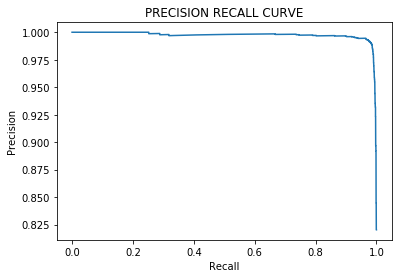

In [ ]:
#Precision = True Positives / (True Positives + False Positives) --> log_reg_precision
#Recall = True Positives / (True Positives + False Negatives) --> log_reg_recall

log_reg_precision, log_reg_recall, thresholds_prc = precision_recall_curve(test_y_e, probabilities[:,1])
pyplot.plot(log_reg_recall, log_reg_precision)
pyplot.title('PRECISION RECALL CURVE')
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.show()

In [ ]:
# plot ROC curve
# use roc_curve function to get fpr and tpr values for different thresholds


In [ ]:
from sklearn.metrics import roc_curve

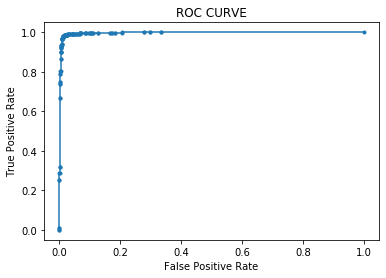

In [ ]:
#False Positive Rate = False Positives / (False Positives + True Negatives) --> log_reg_fpr
#True Positive Rate = True Positives / (True Positives + False Negatives) --> log_reg_tpr

log_reg_fpr, log_reg_tpr, thresholds_roc = roc_curve(test_y_e, probabilities[:,1])
pyplot.plot(log_reg_fpr, log_reg_tpr, marker='.')
pyplot.title('ROC CURVE')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.show()

In [ ]:
# print AUC score

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

In [ ]:
#for roc curve
log_reg_auc_roc_curve = roc_auc_score(test_y_e, probabilities[:,1])
print(f"AUC score for ROC curve =  {log_reg_auc_roc_curve}")

AUC score for ROC curve =  0.9967365254960511


In [ ]:
#for precision recall curve
log_reg_auc_precision_recall_curve = auc(log_reg_recall, log_reg_precision)
print(f"AUC score for Precison-Recall curve =  {log_reg_auc_precision_recall_curve}")

AUC score for Precison-Recall curve =  0.9973093265396353


## MULTICLASS CLASSIFICATION USING LOGISTIC REGRESSION

### f) Training and cross validating logistic regression:

In [ ]:
# 3 fold Cross Validation on train_x_a and train_y with OneVsOneClassifier


In [ ]:
from sklearn.multiclass import OneVsOneClassifier

In [ ]:
model_log_reg = LogisticRegression(solver = 'liblinear', max_iter = 500)
onevsoneclassifier = OneVsOneClassifier(model_log_reg)

In [ ]:
accuracies_onevsoneclassifier = cross_val_score(onevsoneclassifier, train_x, train_y, cv=3)
print(f"Accuracies for OnevsOneClassifier with 3-cv =  {accuracies_onevsoneclassifier}")

Accuracies for OnevsOneClassifier with 3-cv =  [0.81447421 0.81563687 0.8088044 ]


In [ ]:
mean_accuracies_onevsoneclassifier = np.mean(accuracies_onevsoneclassifier)
print(f"Mean ofccuracies for OnevsOneClassifier with 3-cv =  {mean_accuracies_onevsoneclassifier}")

Mean ofccuracies for OnevsOneClassifier with 3-cv =  0.8129718283808164


### g) testing logistic regression:

In [ ]:
# fit model with OneVsOneClassifier
# test model
# print confusion matrix


In [ ]:
onevsoneclassifier.fit(train_x, train_y)
predictions_y_onevsoneclassifier = onevsoneclassifier.predict(test_x)
accuracy_onevsone = accuracy_score(test_y, predictions_y_onevsoneclassifier)
print(f"Accuracy for OnevsOneClassifier =  {accuracy_onevsone}")

Accuracy for OnevsOneClassifier =  0.8204359128174366


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:

confusion_matrix_onevsoneclassifier = confusion_matrix(test_y, predictions_y_onevsoneclassifier)
print('Confusion Matrix for OnevsOneClassifier = ')
print(confusion_matrix_onevsoneclassifier)

Confusion Matrix for OnevsOneClassifier = 
[[400   2   9  21   4   0  60   1   5   0]
 [  3 474   2  10   0   0   2   0   0   0]
 [ 12   2 346   6  59   0  59   0   6   0]
 [ 25  23   8 411  19   0  14   0   7   0]
 [  1   0  50  21 393   0  39   0   2   0]
 [  0   0   0   0   0 419   0  41   3  27]
 [ 85   3  45  32  56   0 290   0   8   0]
 [  0   0   0   0   0  21   0 414   0  36]
 [  3   0   7   4   1   3  11   3 476   0]
 [  0   0   0   0   0   9   0  27   1 480]]


## MULTICLASS CLASSIFICATION USING SVR

### h) Grid search to find best model:

In [ ]:
#prepare datasets for SVM 


In [ ]:
data = pd.read_csv('train.csv')
train_svm_x = data.sample(n=3000)
train_svm_y = train_svm_x.pop('label')
test_svm_x = data.sample(n=1000)
test_svm_y = test_svm_x.pop('label')

In [ ]:
#grid search for best model
#GridSearchCV returns the best model.you can use it for the following questions
#GridSearchCV for SVM may last long (between half an hour and one hour). 

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters_svc = {'kernel':('linear', 'rbf', 'poly'), 'C':[0.1, 0.5, 1, 5, 10], 'tol':[0.0001, 0.001, 0.1]}
model_svc = SVC(gamma = 'auto')
grid_search_svc = GridSearchCV(model_svc, parameters_svc, cv = 5)
grid_search_svc.fit(train_svm_x, train_svm_y)

In [ ]:
#To determine best parameters for grid search using svm
print(f"Best parameters for grid search using svm =  {grid_search_svc.best_params_}")

Best parameters for grid search using svm =  {'C': 0.1, 'kernel': 'linear', 'tol': 0.0001}


In [ ]:
#print accuracy for train set


In [ ]:
parameters_svc_best = {'kernel':['linear'], 'C':[0.1], 'tol':[0.0001]}
model_svc_best = GridSearchCV(model_svc, parameters_svc_best, cv = 5)
model_svc_best.fit(train_svm_x, train_svm_y)
predictions_svc_best_train = grid_search_svc.predict(train_svm_x)


In [ ]:
accuracy_svc_best_train = accuracy_score(train_svm_y, predictions_svc_best_train)
print(f"Accuracy for train data of svm with grid search with best parameters =  {accuracy_svc_best_train}")

Accuracy for train data of svm with grid search with best parameters =  1.0


### i)Testing the best model:

In [ ]:
#calculate and print accuracy and confusion matrix for test set

In [ ]:
predictions_svc_test = model_svc_best.predict(test_svm_x)
accuracy_svc_test = accuracy_score(test_svm_y, predictions_svc_test)
print(f"Accuracy for test data of GridSearch using svm with best parameters =  {accuracy_svc_test}")

Accuracy for test data of GridSearch using svm with best parameters =  0.833


In [ ]:
confusion_matrix_svc = confusion_matrix(test_svm_y, predictions_svc_test)
print(f"Confusion Matrix for SVM = ")
print(confusion_matrix_svc)

Confusion Matrix for SVM = 
[[76  1  2  1  0  0 13  0  0  0]
 [ 0 87  0  2  0  0  0  0  0  0]
 [ 2  0 92  0  8  0  8  0  1  0]
 [10  6  1 70  6  0  3  0  0  0]
 [ 0  0 17  7 71  0  5  0  1  0]
 [ 0  0  0  0  0 86  0  5  1  5]
 [13  0 17  3 10  0 64  0  1  0]
 [ 0  0  0  0  0  4  0 97  0  5]
 [ 0  0  1  1  0  1  0  0 98  0]
 [ 0  0  0  0  0  3  0  3  0 92]]


## MULTICLASS CLASSIFICATION USING DECISION TREES

### j) Grid Search to find best model:

In [ ]:
#GridSearchCV returns the best model.you can use it for the following questions

In [ ]:
from sklearn import tree

In [ ]:
parameters_decision_tree = {'max_depth':[2, 4, 10], 'min_samples_split':[2, 3, 4]}
model_decision_tree = tree.DecisionTreeClassifier()
grid_search_decision_tree = GridSearchCV(model_decision_tree, parameters_decision_tree, cv = 5)
grid_search_decision_tree.fit(train_x, train_y)

In [ ]:
#To determine best parameters for grid search using decision tree 
print(f"Best parameters for grid search using decision tree  =  {grid_search_decision_tree.best_params_}")

Best parameters for grid search using decision tree  =  {'max_depth': 10, 'min_samples_split': 2}


In [ ]:
parameters_decision_tree_best = {'max_depth':[10], 'min_samples_split':[2]}
model_decision_tree_best = GridSearchCV(model_decision_tree, parameters_decision_tree_best, cv = 5)
model_decision_tree_best.fit(train_x, train_y)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [10], 'min_samples_split': [2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_sc

In [ ]:
predictions_decision_tree_best_train = model_decision_tree_best.predict(train_x)
accuracy_decision_tree_train = accuracy_score(train_y, predictions_decision_tree_best_train)
print(f"Accuracy for train data of GridSearch using decision tree with best parameters = {accuracy_decision_tree_train}")

Accuracy for train data of GridSearch using decision tree with best parameters = 0.858671377620746


### k) Testing the best model:

In [ ]:
# calculate test accuracy
# print confusion matrix

In [ ]:
predictions_decision_tree_test = model_decision_tree_best.predict(test_x)
accuracy_decision_tree_test = accuracy_score(test_y, predictions_decision_tree_test)
print(f"Accuracy for test data of GridSearch using decision tree with best parameters =  {accuracy_decision_tree_test}")

Accuracy for test data of GridSearch using decision tree with best parameters =  0.7994401119776045


In [ ]:
confusion_matrix_decision_tree = confusion_matrix(test_y, predictions_decision_tree_test)
print(f"Confusion Matrix for Decision Tree =")
print(confusion_matrix_decision_tree)

Confusion Matrix for Decision Tree =
[[377   1   9  37   5   1  66   0   6   0]
 [  6 463   2  18   0   0   2   0   0   0]
 [  6   0 311   3  88   2  73   1   6   0]
 [ 16  11   3 417  27   1  27   1   4   0]
 [  2   2  35  19 385   0  60   0   3   0]
 [  1   0   0   1   0 428   2  29   8  21]
 [ 92   2  53  21  62   1 278   0   9   1]
 [  0   0   0   1   0  17   1 425   2  25]
 [  3   2   7   6   6   5  15   4 455   5]
 [  1   0   0   0   1  13   0  43   0 459]]
